In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the file and name the column


In [98]:
df = pd.read_csv('Lyrics Cleaned.csv')
df.head()

,Songs,Lyrics
0,Need Another Drink,Hybrid When It's Hot You need another drink ...
1,Detroit State Of Mind Pt. 2,"Roaches crawlin' up the wall, piss-stained be..."
2,Pac Blood,"The Shakespeare of 16's, dipping my ink pen M..."
3,Kush Coma,"Close my eyes, feel like I'm going down In an ..."
4,Best Life,"La la la la la, la la la La la la la la, la la..."


# Count Words, lexical density, etc

The lines below show You two ways of measuring the lyrical density of an artist. 
 - The first is using a lambda expression and a sum() method to calculate the words, and uniq words in each song
 - Then I sum these two columns, and divide total_uniq with total_words 


The other method is using NLTK which seems more accurate, as the percentage is close to the result from https://pudding.cool/projects/vocabulary/index.html


In [99]:
df['characters'] = df.Lyrics.str.len()
df['words'] = df.Lyrics.str.split().str.len()
df['lines'] = df.Lyrics.str.split('\n').str.len()
df['uniq_words'] = df.Lyrics.apply(lambda x: len(set(x.split())))
df['lexical_density'] = df['uniq_words'] / df['words']

df.head()

,Songs,Lyrics,characters,words,lines,uniq_words,lexical_density
0,Need Another Drink,Hybrid When It's Hot You need another drink ...,1723,350,1,189,0.540000
1,Detroit State Of Mind Pt. 2,"Roaches crawlin' up the wall, piss-stained be...",2180,407,1,246,0.604423
2,Pac Blood,"The Shakespeare of 16's, dipping my ink pen M...",1701,308,1,219,0.711039
3,Kush Coma,"Close my eyes, feel like I'm going down In an ...",3856,799,1,335,0.419274
4,Best Life,"La la la la la, la la la La la la la la, la la...",2088,449,1,192,0.427617


In [100]:
df['words'].sum()

43980

In [101]:
def total_density():
    total_words = df['words'].sum()
    total_uniq = df['uniq_words'].sum()
    return total_uniq / total_words

In [102]:
total_words = df['words'].sum()
total_uniq = df['uniq_words'].sum()
total_uniq

24277

In [103]:
total_density()

0.5520009095043201

# Calculate vocabulary with NLTK

Here I'm using the methods describet at http://www.nltk.org/book/ch01.html

 - First I export the DF to a TXT format
 - Then I import NLTK and word_tokenize
 - With len(set()) and len() I calculate the number of uniq words and the total words
 - After that I write a function which calculates the density of the vocabulary.
 
My density is 13% using 49000 total words and puctuations, the pudding.cool study used 35000 words and got 12% for Danny Brown

In [44]:
text = df.Lyrics.to_csv(sep=' ', index=False, header=False)

In [104]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Matyas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Matyas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [105]:
tokenized = word_tokenize(text)

In [106]:
len(set(tokenized))

6697

In [107]:
len(tokenized)

49851

In [108]:
def lexical_richness(text):
    return len(set(text)) / len(text)

In [109]:
lexical_richness(tokenized)

0.1343403341959038

# Create Graphs Based on the DataFrame

Most Songs are between 250 and 500 words, and most songs have a vocabulary betweeb 200 and 300  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A818A4AE88>,
      dtype=object)

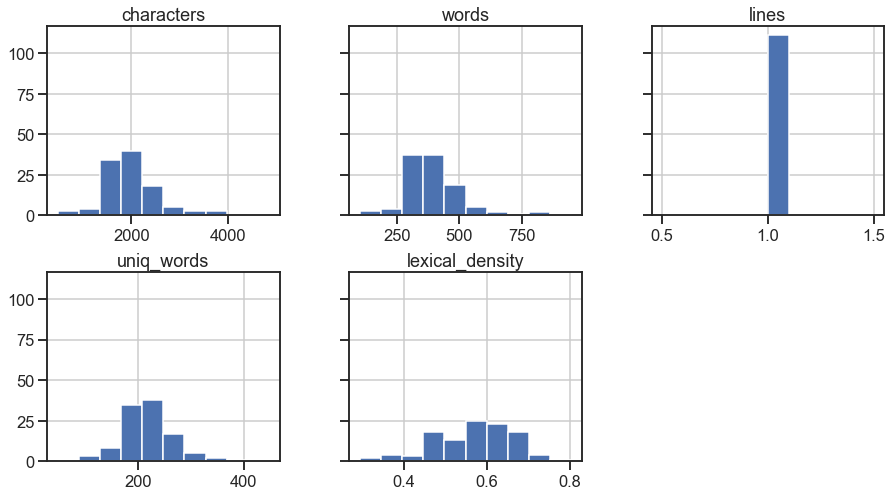

In [110]:
df.hist(sharey=True, layout=(2, 3), figsize=(15, 8))

# Common Long Words and Tri-grams

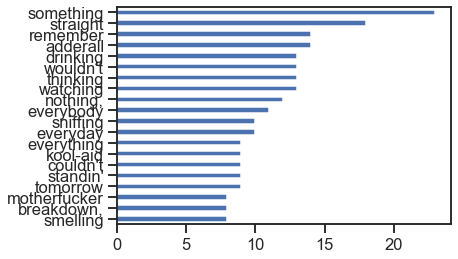

In [111]:
pd.Series([w for w in ' '.join(df.Lyrics).lower().split() if len(w) > 7]).value_counts()[:20][::-1].plot(kind='barh')

In [76]:
from nltk import ngrams


def get_ngrams_from_series(series, n=2):
    # using nltk.ngrams
    lines = ' '.join(series).lower().split('\n')
    lgrams = [ngrams(l.split(), n) for l in lines]
    grams = [[' '.join(g) for g in list(lg)] for lg in lgrams]
    return [item for sublist in grams for item in sublist]



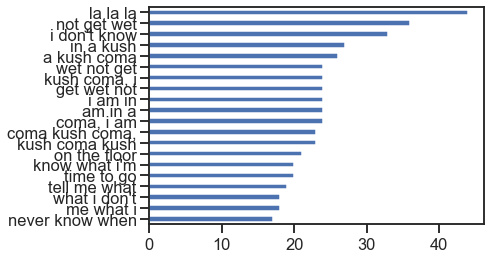

In [81]:
pd.Series(get_ngrams_from_series(df.Lyrics, 3)).value_counts()[:20][::-1].plot(kind='barh')

# Sentiment Analysis

In [82]:
import nltk
from nltk import sentiment
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Matyas\AppData\Roaming\nltk_data...


True

None


In [112]:

senti_analyze = sentiment.vader.SentimentIntensityAnalyzer()

df['sentiment_rating'] = pd.DataFrame(df.Lyrics.apply(senti_analyze.polarity_scores).tolist())['compound']
df['sentiment'] = pd.cut(df['sentiment_rating'], [-np.inf, -0.35, 0.35, np.inf], labels=['negative', 'neutral', 'positive'])

df.head()

,Songs,Lyrics,characters,words,lines,uniq_words,lexical_density,sentiment_rating,sentiment
0,Need Another Drink,Hybrid When It's Hot You need another drink ...,1723,350,1,189,0.540000,-0.9564,negative
1,Detroit State Of Mind Pt. 2,"Roaches crawlin' up the wall, piss-stained be...",2180,407,1,246,0.604423,-0.9971,negative
2,Pac Blood,"The Shakespeare of 16's, dipping my ink pen M...",1701,308,1,219,0.711039,-0.9717,negative
3,Kush Coma,"Close my eyes, feel like I'm going down In an ...",3856,799,1,335,0.419274,-0.9932,negative
4,Best Life,"La la la la la, la la la La la la la la, la la...",2088,449,1,192,0.427617,0.9941,positive


# Does Sentiment score correlate with other metrics?

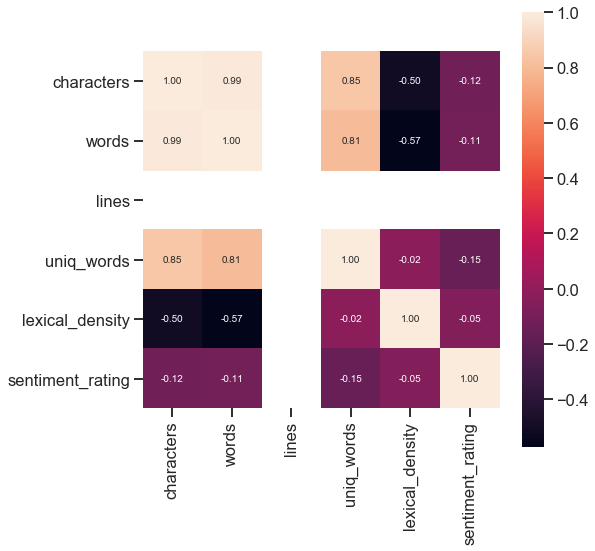

In [113]:
corr = df.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, fmt='.2f', square=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)



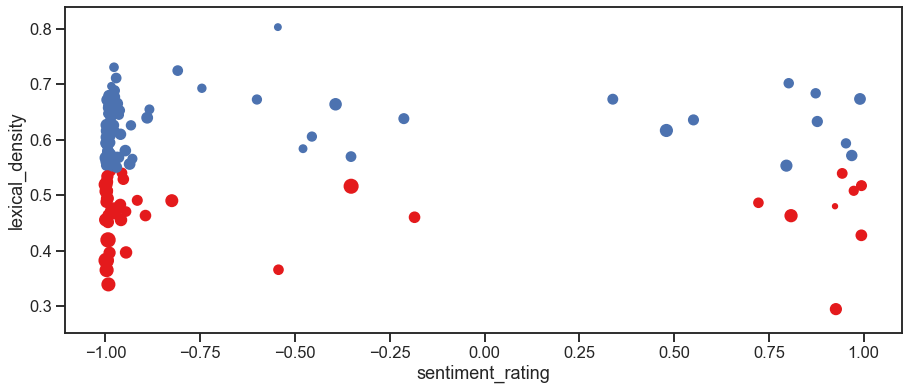

In [115]:
df.plot.scatter(x='sentiment_rating', y='lexical_density', s=df['characters']/20,
                c=np.where(df['lexical_density'].le(0.55), '#e41a1c', '#4c72b0'),
                figsize=(15, 6))

Songs with lower sentiment rating tend to have higher lexical density

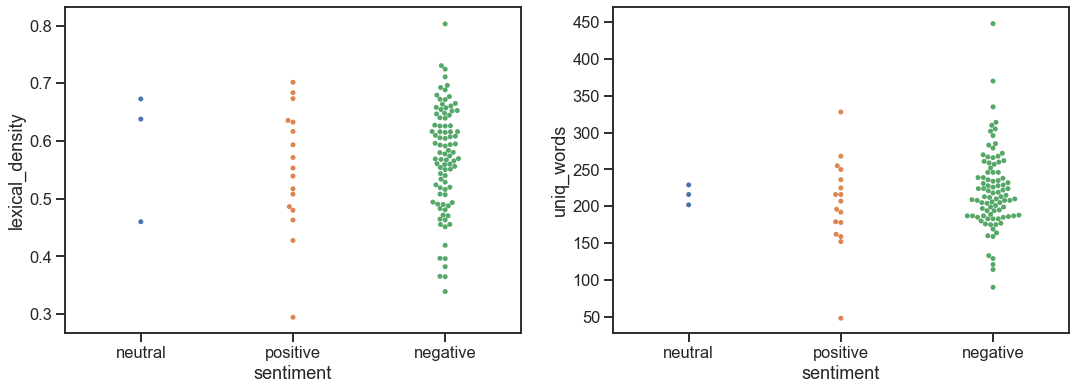

In [117]:
cols_metrics = ['lexical_density', 'uniq_words']
fig, axs = plt.subplots(figsize=(18, 6), ncols=len(cols_metrics))
for i, c in enumerate(cols_metrics):
    sns.swarmplot(x='sentiment', y=c, data=df, ax=axs[i], order=['neutral', 'positive', 'negative'])

Negative songs get a high lexical density but they have a larger spread
Negative songs have higher uniq words 

# Markov Chain song generator

In [118]:
import re
import random
from collections import defaultdict


class MarkovRachaita:
    def __init__(self, corpus='', order=2, length=8):
        self.order = order
        self.length = length
        self.words = re.findall("[a-z']+", corpus.lower())
        self.states = defaultdict(list)

        for i in range(len(self.words) - self.order):
            self.states[tuple(self.words[i:i + self.order])].append(self.words[i + order])

    def gen_sentence(self, length=8, startswith=None):
        terms = None
        if startswith:
            start_seed = [x for x in self.states.keys() if startswith in x]
            if start_seed:
                terms = list(start_seed[0])
        if terms is None:
            start_seed = random.randint(0, len(self.words) - self.order)
            terms = self.words[start_seed:start_seed + self.order]

        for _ in range(length):
            terms.append(random.choice(self.states[tuple(terms[-self.order:])]))

        return ' '.join(terms)

    def gen_song(self, lines=10, length=8, length_range=None, startswith=None):
        song = []
        if startswith:
            song.append(self.gen_sentence(length=length, startswith=startswith))
            lines -= 1
        for _ in range(lines):
            sent_len = random.randint(*length_range) if length_range else length
            song.append(self.gen_sentence(length=sent_len))
        return '\n'.join(song)

In [123]:
dannyai = MarkovRachaita(corpus=' '.join(df.Lyrics))
dannyai.gen_song(lines=10, length_range=[6, 10])

"owing us for credit taking turns catching shells things\nthat i be gettin' head isn't that ironic like alanis morissette\na nigga now her baby have a drink can't even think\ncup of goose pinch of cran and she pop that\nyou know just what i seen doin' laundry\nthe ground now tell me what i don't need\nshit be fucking my lungs fuckin' two asian bitches\nrevolver breakdancin yeah he dance good but good\nlips like estelle new sl lights like fish eyes bitches say the\nthe chevy same color as a coochie detroit"

# Text Classification 

In [133]:
# Import stopwords and punkt

from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Remove stopwords from text

stopwords = set(stopwords.words("english"))
all_words =[]
raw = text
tokens = nltk.word_tokenize(raw)
texts = word_tokenize(raw)
for w in texts:
    if w not in stopwords:
        all_words.append(w)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Matyas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Matyas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


The Below code classifies the parts of speech in the updated list.
Then it assigns it to a dataframe

In [134]:
tagged = nltk.pos_tag(all_words)
print(all_words)

['``', 'Hybrid', 'When', 'It', "'s", 'Hot', 'You', 'need', 'another', 'drink', 'What', 'cha', "'", 'think', 'A', 'nigga', 'gon', 'na', 'Go', 'outside', 'Smoke', 'blunt', 'car', 'come', 'back', 'And', 'get', 'love', 'club', 'I', 'see', 'lot', 'hoes', 'They', 'dick', 'Bunch', 'player', 'haters', 'want', 'front', 'bitch', 'If', 'bitch', 'want', 'fuck', 'Then', 'let', 'thing', 'Just', 'step', 'fuck', 'back', 'let', 'give', 'brains', 'I', "'m", 'insane', 'like', "'m", 'sayin', "'", 'It', "'s", 'like', 'I', 'got', 'two', 'brains', 'See', 'shoe', 'game', 'Hate', "'m", 'shit', "'s", 'butane', "Y'all", 'niggas', 'lame', 'My', 'bill', 'game', 'like', 'poon', 'tang', 'Nine', 'niggas', 'track', 'like', 'Wu', 'Tang', 'Shoot', 'like', 'two', 'God', 'lame', 'Big', 'ving-rang', 'niggas', 'door', 'like', '...', 'like', '...', 'like', '...', 'rang', '?', 'No', 'need', 'ID', 'Walk', 'straight', 'past', 'security', "n't", 'search', 'Put', 'three', 'numbers', 'phone', 'RS-VIP', 'When', 'It', "'s", 'Hot', '

In [135]:
nouns_and_verbs = [word[0] for word in tagged if word[1] in ['JJ', 'JJR', 'JJS']]
adj_freq = nltk.FreqDist(nouns_and_verbs)
adj_freq

In [137]:
df_tagged = pd.DataFrame(tagged)
df_tagged.columns =['Words','POS']
df_tagged.tail()

,Words,POS
34101,drink,VB
34102,fifth,JJ
34103,niggas,NN
34104,!,.
34105,'',''


#  Pairing up words with their parts of speech

In [138]:
from collections import Counter
from  itertools import combinations

n = 10
L = Counter([y for x in df_tagged.values for y in combinations(x, 2)]).most_common(n)

df_paired = pd.DataFrame(L, columns=['Pair', 'Qty'])
print (df_paired)

         Pair   Qty
0      (,, ,)  2093
1    (I, PRP)  1804
2   (n't, RB)   670
3   ('m, VBP)   550
4  (like, IN)   520
5     (', '')   404
6    ('', '')   389
7   ('s, POS)   338
8   (And, CC)   296
9  (got, VBD)   268


In [139]:
df_verb_bool = df_tagged['POS']=='VBP'
df_verb = df_tagged[df_verb_bool]
df_verb_sorted= pd.value_counts(df_verb['Words'].values, sort=True).head()
df_verb_sorted

'm      550
ai      246
know    109
say      71
go       60
dtype: int64

In [140]:
n = 5
df_tagged['POS'].value_counts()[:n].index.tolist()

['NN', 'NNP', 'JJ', 'VBP', 'PRP']